In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, cv2, itertools # cv2 -- OpenCV
import matplotlib.pyplot as plt 
import zipfile as ZipFile
import random
%matplotlib inline

In [2]:
from zipfile import ZipFile
zf = ZipFile(r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip', 'r')
zf.extractall(r'C:\Users\נעמיה\data-science\sb')
zf.close()

In [148]:

path=r'./train/'
data = []
label = []
c = 0
d = 0
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=cv2.resize(img,(250,250))
    img=img.astype('float32')
    
    if file[:3]=='cat':
        if c==200: continue
        c+=1
        label.append("cat")
    else:
        if d==200: continue
        d+=1
        label.append("dog")
    
    data.append(img)
data = np.array(data)
 

In [150]:
data_label = []
for i in label:
    if i=="cat": data_label.append(0)
    else: data_label.append(1)
data_label = np.array(data_label)

In [151]:
data_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [3]:
filenames = os.listdir(r'C:\Users\נעמיה\data-science\sb\train')
categories = []
for filename in filenames:
    
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
df.head(10)

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
5,cat.10000.jpg,cat
6,cat.10001.jpg,cat
7,cat.10002.jpg,cat
8,cat.10003.jpg,cat
9,cat.10004.jpg,cat


In [5]:
df.tail(10)

,filename,category
24990,dog.9990.jpg,dog
24991,dog.9991.jpg,dog
24992,dog.9992.jpg,dog
24993,dog.9993.jpg,dog
24994,dog.9994.jpg,dog
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


(array([0, 1]), [Text(0, 0, 'cat'), Text(1, 0, 'dog')])

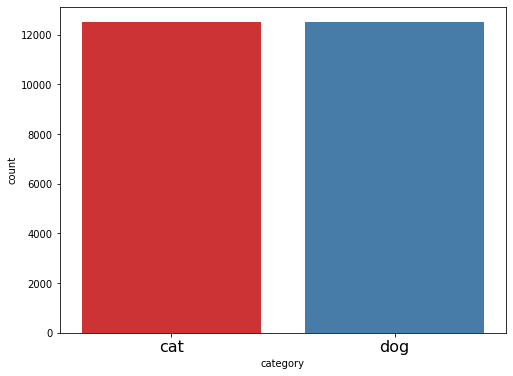

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="category",palette="Set1")
plt.xticks(fontsize=16)

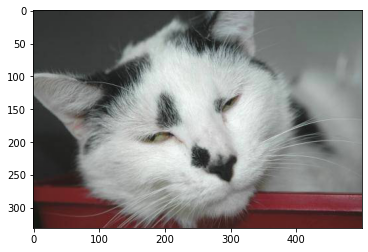

In [122]:
sample = random.choice(filenames)
example = r'./train/'+ sample
plt.imshow(plt.imread(example))

In [123]:
dim = (250, 250)
def resize_image(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)

In [124]:
resize_image(image).shape

(250, 250, 3)

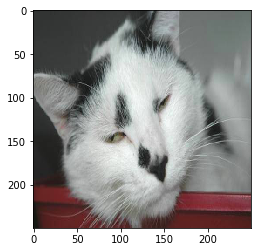

In [125]:
from matplotlib import pyplot as plt

data=resize_image(example)
plt.imshow(data, interpolation='nearest')
plt.show()

In [83]:
img_res=[]
for img in df['filename']:
    path=r'./train/'+ img
    new_img=resize_image(path)
    img_res.append(new_img)

In [126]:
df['filename']=img_res


In [91]:
from sklearn.model_selection import train_test_split
X=df['filename']
y=df['category']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

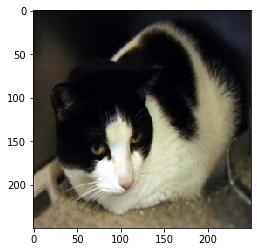

In [127]:
plt.imshow(X[80], interpolation='nearest')
plt.show()

In [135]:
hist = np.histogram(X[80].flatten(),256,[0,256])[0]

In [137]:
image = cv2.imread (example)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [142]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 25, max_depth = 12))
])
pipe_rf.fit(x_train, y_train)
rfpred = pipe_rf.predict(x_test)

ValueError: setting an array element with a sequence.

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(187, 0.85), xytext=(150, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

ValueError: setting an array element with a sequence.

In [80]:
df['filename'][2]

'cat.10.jpg'

In [143]:
from cv2 import PCACompute

In [146]:
vec = image.reshape(250 * 250)

    # stack them up to form the matrix
try:
    in_matrix = np.vstack((in_matrix, vec))
except:
    in_matrix = vec

# PCA 
if in_matrix is not None:
    mean, eigenvectors = cv2.PCACompute(in_matrix, np.mean(in_matrix, axis=0).reshape(1,-1))  

ValueError: cannot reshape array of size 496500 into shape (62500,)